# Exercise 5: Regularized Linear Regression and Bias vs Variance

In this exercise, we will implement regularized linear regression and use it to study models with different bias-variance properties. 

In [1]:
# importing the important Libraries

# Used for computations of numerical data.
import numpy as np

# Used for reading data and data manipulation
import pandas as pd 

# Used for graphing data.
import matplotlib.pyplot as plt

# Used to load the OCTAVE *.mat files
from scipy.io import loadmat

# Optimization module in scipy
from scipy import optimize
import scipy.optimize as opt

import utils


# tells matplotlib to embed plots within the notebook
%matplotlib inline

# ===== Part 1: Loading and Visualizing Data =====

The dataset is divided into 3 parts: Training (n = 12), cross validation (n = 21) and test (n = 21). Start by plotting the data: Water flowing out the dam (y), against change in water level (x).

[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]


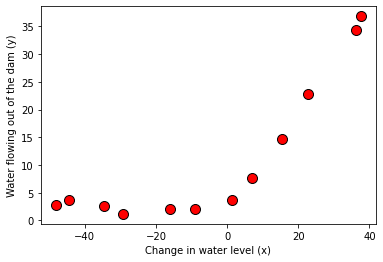

In [2]:
# Load data from ex5data1.mat, where all variables are stored in a dictionary
data = loadmat('C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex5-jin\\ex5data1.mat')

# Extract train, test, validation data from dictionary
# and also convert y's form 2-D matrix (MATLAB format) to a numpy vector

# Training set that our model will learn on X and y
X, y = data['X'], data['y'][:, 0]

# A test set for evaluating performance. These are "unseen" examples which 
# our model did not see during training: Xtest, ytest
Xtest, ytest = data['Xtest'], data['ytest'][:, 0]

# A cross validation set for determining the regularization parameter: Xval, yval
Xval, yval = data['Xval'], data['yval'][:, 0]

print(X)

# m = Number of examples
m = y.size

# Plot training data
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

# ===== Part 2: Regularized Linear Regression Cost =====

Lets calculate the regularized linear regression cost function. If possible, we will try to vectorize our code and avoid writing loops.

In [3]:
def linearRegCostFunction(X, y, theta, lambda_=0.0):

    # Initialize some useful values
    m = y.size # number of training examples

    # we need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    
    h_theta = X@theta
    
    theta_new = theta.copy()
    theta_new[0] = 0
    reg = (lambda_/(2*m)) * np.sum( np.square(theta_new))
    
    J = (1/(2*m)) * np.sum( np.square(h_theta - y)) + reg
    
    grad =  (1/m) * (X.T @ (h_theta - y) + lambda_*theta_new)

    return J, grad

now, lets run our cost function using theta initialized at [1, 1]

In [54]:
theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192)



# ===== Part 3: Regularized Linear Regression Gradient =====

now, will implement the gradient for regularized linear regression. Run the gradient function using theta initialized at [1, 1]. We should expect to see a gradient of [-15.30, 598.250].

In [55]:
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.concatenate([np.ones((m, 1)), X], axis=1), y, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



# ===== Part 4: Train Linear Regression =====

### Fitting linear regression

Once our cost function and gradient are working correctly, the next cell will run the code in trainLinearReg, to compute the optimal values of $\theta$. This training function uses scipy's optimization module to minimize the cost function.
In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a  of such low dimension. In the later parts of the exercise, we will be using polynomial regression with regularization.  
The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, we will implement a function to generate learning curves that can help us debug our learning algorithm even if it is not easy to visualize the data.  

In [83]:
# For graph plotting
def trainLinearReg(linearRegCostFunction, X, y, lambda_=0.0, maxiter=200):
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])
    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t: linearRegCostFunction(X, y, t, lambda_)
    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': maxiter}
    # Minimize using scipy
    res = optimize.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x

def plotFit(polyFeatures, min_x, max_x, mu, sigma, theta, p):
    # We plot a range slightly bigger than the min and max values to get
    # an idea of how the fit will vary outside the range of the data points
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)
    # Map the X values
    X_poly = polyFeatures(x, p)
    X_poly -= mu
    X_poly /= sigma
    # Add ones
    X_poly = np.concatenate([np.ones((x.shape[0], 1)), X_poly], axis=1)
    # Plot
    plt.plot(x, np.dot(X_poly, theta), '--', lw=2)


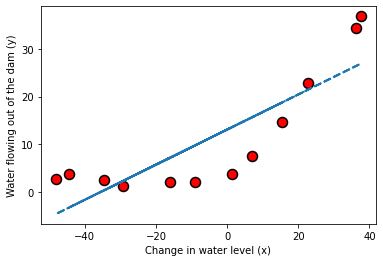

In [84]:
# add a columns of ones for the y-intercept
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = trainLinearReg(linearRegCostFunction, X_aug, y, lambda_=0)

#  Plot fit over the data
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(X_aug, theta), '--', lw=2);

# ===== Part 5: Learning Curve for Linear Regression =====

### Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.  
Here we will plot training and test errors on a learning curve to investigate bias and variance.  

### Learning curves
we will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. our job is to fill in the function learningCurve, so that it returns a vector of errors for the training set and cross validation set.  
To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, we should use different subsets of the original training set X. Specifically, for a training set size of i, ishould use the first i examples (i.e., X[:i, :] and y[:i]).  
A learning curve plots error as a function of training set size. Taking a subset of the training set, we calculate theta values, compute the corresponding training error and cross validation error, then iterate over increasing training set size to see the shape of the learning curve.  

In [85]:
def learningCurve(X, y, Xval, yval, lambda_=0):
    # Number of training examples
    m = y.size

    # We need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
         
    for i in range(1, m + 1):
        theta = trainLinearReg(linearRegCostFunction, X[:i, :], y[:i], lambda_)
        error_train[i - 1] = linearRegCostFunction(X[:i, :], y[:i], theta, 0)[0]
        error_val[i - 1] = linearRegCostFunction(Xval, yval, theta, 0)[0]
        
    return error_train, error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


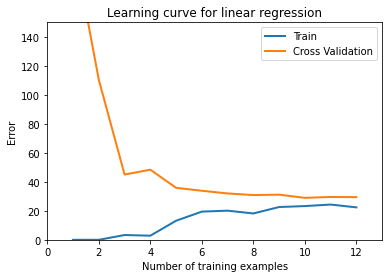

In [86]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In the learning curve figure, we can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model - the linear regression model is too simple and is unable to fit our dataset well. In the next section, we will implement polynomial regression to fit a better model for this dataset.

# ===== Part 6: Feature Mapping for Polynomial Regression =====

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.  
So, here we add more features, by using high powers of the existing feature x (water level). Let’s make a function that takes a matrix with the ones for the theta(0) term already included, and returns our higher dimension matrix.

In [88]:
def polyFeatures(X, p):

    # You need to return the following variables correctly.
    X_poly = np.zeros((X.shape[0], p))

    for i in range(p):
        X_poly[:, i] = np.power(X, i+1).T

    return X_poly

Since we are using higher order polynomials, feature normalization helps keep our numbers manageable.

In [89]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

Now, We have a function that will map features to a higher dimension. The next cell will apply it to the training set, the test set, and the cross validation set.

In [90]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

# ===== Part 7: Learning Curve for Polynomial Regression =====

After we have completed the function polyFeatures, we will proceed to train polynomial regression using your linear regression cost function.

Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$). Therefore, you will need to use feature normalization.

Before learning the parameters $\theta$ for the polynomial regression, we first call featureNormalize and normalize the features of the training set, storing the mu, sigma parameters separately. 

After learning the parameters $\theta$, you should see two plots generated for polynomial regression with $\lambda = 0$

Polynomial Regression (lambda = 100.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.114107	144.125230
  	3		106.956580	70.863286
  	4		121.740879	78.372963
  	5		102.949459	63.845046
  	6		97.169857	59.532632
  	7		83.326539	59.585493
  	8		76.491825	58.699842
  	9		71.297176	59.564455
  	10		64.350636	59.731344
  	11		58.997943	60.409869
  	12		57.977080	57.842195


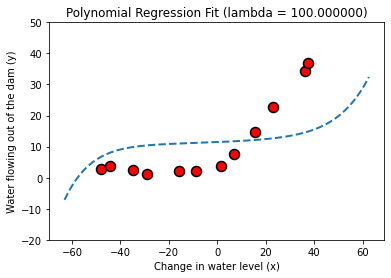

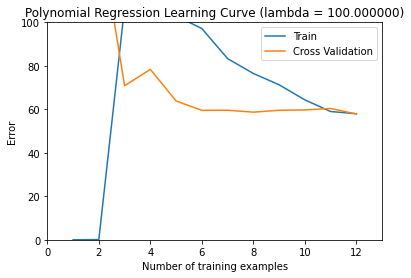

In [91]:
lambda_ = 100
theta = trainLinearReg(linearRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))


One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, We will get to try different $\lambda$ parameters to see how regularization can lead to a better model.

# ===== Part 8: Validation for Selecting Lambda =====

In this section, we will observe how the regularization parameter affects the bias-variance of regularized polynomial regression. We should now modify the the lambda parameter and try $\lambda = 1, 100$. For each of these values, the script should generate a polynomial fit to the data and also a learning curve.

For $\lambda = 1$, the generated plots should look like the the figure below. You should see a polynomial fit that follows the data trend well (left) and a learning curve (right) showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda = 1$ regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.
For $\lambda = 100$, we should see a polynomial fit (figure below) that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

### Selecting  using a cross validation set
From the previous parts of the exercise, We observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda=0$) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda=100$) does not fit the training set and testing set well. A good choice of  $\lambda$(e.g., $\lambda=1$) can provide a good fit to the data.

In this section, we will implement an automated method to select the $\lambda$ parameter. Concretely, we will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

we will use the trainLinearReg function to train the model using different values of  and compute the training error and cross validation error in the function validationCurve. we should try  in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [96]:
def validationCurve(X, y, Xval, yval):
    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    for i in range(1, len(lambda_vec) + 1):
        lambda_ = lambda_vec[i - 1]
        theta = trainLinearReg(linearRegCostFunction, X, y, lambda_)
        error_train[i - 1] = linearRegCostFunction(X, y, theta, 0)[0]
        error_val[i - 1] = linearRegCostFunction(Xval, yval, theta, 0)[0]

    return lambda_vec, error_train, error_val

After this, now, we will run our function and plot a cross validation curve of error v.s. $\lambda$ that allows us select which $\lambda$ parameter to use.

lambda		Train Error	Validation Error
 0.000000	0.029686	43.849641
 0.001000	0.113053	9.931598
 0.003000	0.170918	16.324192
 0.010000	0.221495	16.947421
 0.030000	0.281856	12.829038
 0.100000	0.459333	7.586743
 0.300000	0.921762	4.636836
 1.000000	2.076199	4.260603
 3.000000	4.901377	3.822907
 10.000000	16.092273	9.945554


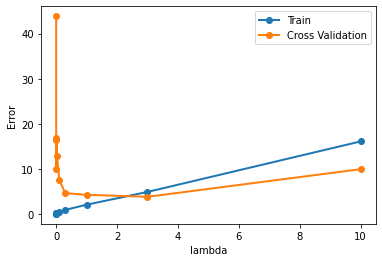

In [97]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

# ===== Part 9: Computing test set error and Plotting learning curves with randomly selected examples=====

In practice, especially for small training sets, when We plot learning curves to debug our algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error.

Concretely, to determine the training error and cross validation error for  examples, we should first randomly select i examples from the training set and i examples from the cross validation set. You will then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say 50) and the averaged error should be used to determine the training error and cross validation error for i examples.

For this exercise, We should implement the above strategy for computing the learning curves. For reference, the figure below shows the learning curve we obtained for polynomial regression with $\lambda = 0.01$. our figure may differ slightly due to the random selection of examples.

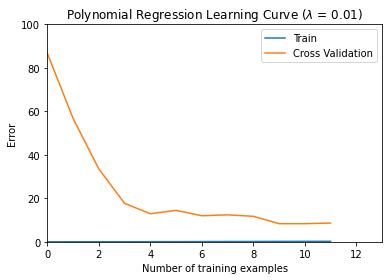

In [100]:
lambda_ = 0.01
repeat = 50

m = X_poly.shape[0]
error_train = np.zeros(m)
error_val = np.zeros(m)

for i in range(m):
    # Initialize Theta
    initial_theta = np.zeros(X_poly.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t, X, y: linearRegCostFunction(X, y, t, lambda_)[0]
    gradFunction = lambda t, X, y: linearRegCostFunction(X, y, t, lambda_)[1]

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': 200, 'disp': False}
    error_train_temp = 0
    error_val_temp = 0
    
    for j in range(repeat):
        random_i = np.random.permutation(m)[:i + 1]
        # Minimize using fmincg
        res = opt.minimize(costFunction, initial_theta, args=(X_poly[random_i], y[random_i]), method='CG', jac=gradFunction, options=options)
        theta = res.x
        error_train_temp += linearRegCostFunction(X_poly[random_i], y[random_i], theta, 0)[0]
        error_val_temp += linearRegCostFunction(X_poly_val[random_i], yval[random_i], theta, 0)[0]
    
    error_train[i] = error_train_temp / repeat
    error_val[i] = error_val_temp / repeat
    
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m), error_val)

plt.title(f'Polynomial Regression Learning Curve ($\lambda$ = {lambda_:g})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])
plt.show()